Lets study more about how to initiate with new dataset and fundamental ways to deal with numeric and non-numeric data.

In [2]:
import pandas as pd

In [3]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [4]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [5]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Here lets make use of 'genre'(object which is usually String data type) and 'duration'(integer) column for practice.

In [6]:
movies.genre.describe()
# describe() is not only Series method but also Dataframe method.

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

Above results shows, count of non-null values, unique values, most common value is 'Drama',frequency of the most common value. 
So out of 979 non-null values 278 of them were 'Drama'. So describe() method gives some useful information. 

Here will show you which is similar as describe() but which provide some more than describe(). That is value_counts()  :  

In [8]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

value_counts() shows us each value of how often it appears in this Series, in other words value_counts() Return a Series containing counts of unique values.

One cool feature of value_counts() is we can convert above raw numbers to percentage by adding 'normalize' argument as below:

In [10]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

Above results says, for eg: 28% of movies in this genre Series are of type 'Drama' and so on.

Good thing about pandas is, generally Series and Dataframe methods output New Series and Dataframe objects. For instance:

In [12]:
type(movies.genre.value_counts()) 

pandas.core.series.Series

Here above, the output of value_counts() itself is Series. As a result, we could use any of the Series method like head() etc with value_counts(). We can also think, on current situation with value_counts, what other Series or Dataframe methods we can make use of.

In [13]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

unique(): Allows us to see what are all unique values in this series.

In [15]:
movies.genre.nunique() # nunique(): Return number of unique elements in the Series.

16

###### Crosstab:

For Instance : Crosstab allows us to see a tally count of how many movies belong to each combination of 'genre' and 'content_rating'.

In [16]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Lets see some more with 'duration' column which is a numeric as below:

In [17]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

describe() is a Series method which also works on numeric columns and will see summary of some statistics like median, mean, min, max and so on. we can pull out one of these statistics method which is mean() as below:

In [18]:
movies.duration.mean()

120.97957099080695

So we can do various of calculation available as Series methods that we can use for numeric columns.

We can use value_counts on 'duration' column too as below:

In [20]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

For instance, above results are saying is 23 movies with duration 112minutes and 22 movies with duration 113minutes and so on.

Probably, value_counts() is not much useful with numeric columns like 'duration', but we can think of if we had categorical data, that was represented as integers than value_counts() might be useful or else value_counts() is mostly used with object which is usually String data type.

###### Useful tip about some visualisation:

In [23]:
%matplotlib inline 
# in ipython notebook '%matplotlib inline': which allows plots to appear in notebook

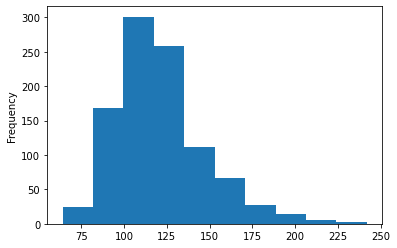

In [24]:
movies.duration.plot(kind='hist')

Above is a histogram of the 'duration'. Histogram shows you the distribution of a single numerical variable. 

In [25]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

We can actually represent the above genre.value_counts() as a plot as shown below:

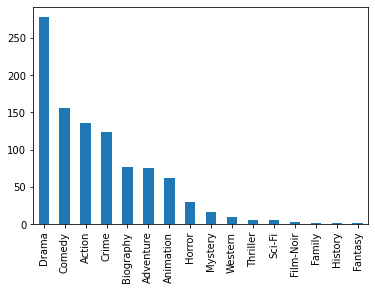

In [26]:
movies.genre.value_counts().plot(kind='bar')

So, there are lot more we could say about visulaization, where we can do dozens of customizations we can do these plots as well to make them look and display exactly what we need.